In [10]:
!pip install opencv-python
import cv2
import numpy as np
import string
import os
import matplotlib.pyplot as plt

In [11]:
import cv2
import numpy as np
import string
import os
import matplotlib.pyplot as plt

In [12]:
d={chr(i): i for i in range(255)}
c={i:chr(i) for i in range(255)}

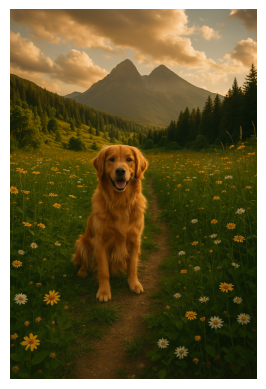

In [13]:
image_path=r"/content/Steganography_image.png"
x=cv2.imread(image_path)
xrgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.axis('off')
plt.show()

In [14]:
x.shape

(1536, 1024, 3)

In [15]:
key="721"
text="Hello World"

In [16]:
text_ascii=[d[ch] for ch in text]
key_ascii=[d[ch] for ch in key]
print(text_ascii)
print(key_ascii)

[72, 101, 108, 108, 111, 32, 87, 111, 114, 108, 100]
[55, 50, 49]


In [17]:
x_enc=x.copy()
n=0 #number of rows
m=0 #number of coloumns
z=0 #colour panel
l=len(text)
kl=0
for i in range(l):
    orig_val=x_enc[n,m,z]
    new_val=d[text[i]]^d[key[kl]]
    x_enc[n,m,z]=new_val
    print(f"Embedding '{text[i]}'(ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]})={new_val} at pixel ({n},{m},{z}) [original={orig_val}]")
    n=n+1
    m=m+1
    m=(m+1)%3
    z=(z+1)%3
    kl=(kl+1)%len(key)


Embedding 'H'(ASCII 72) XOR '7' (ASCII 55)=127 at pixel (0,0,0) [original=56]
Embedding 'e'(ASCII 101) XOR '2' (ASCII 50)=87 at pixel (1,2,1) [original=95]
Embedding 'l'(ASCII 108) XOR '1' (ASCII 49)=93 at pixel (2,1,2) [original=120]
Embedding 'l'(ASCII 108) XOR '7' (ASCII 55)=91 at pixel (3,0,0) [original=57]
Embedding 'o'(ASCII 111) XOR '2' (ASCII 50)=93 at pixel (4,2,1) [original=95]
Embedding ' '(ASCII 32) XOR '1' (ASCII 49)=17 at pixel (5,1,2) [original=123]
Embedding 'W'(ASCII 87) XOR '7' (ASCII 55)=96 at pixel (6,0,0) [original=56]
Embedding 'o'(ASCII 111) XOR '2' (ASCII 50)=93 at pixel (7,2,1) [original=97]
Embedding 'r'(ASCII 114) XOR '1' (ASCII 49)=67 at pixel (8,1,2) [original=128]
Embedding 'l'(ASCII 108) XOR '7' (ASCII 55)=91 at pixel (9,0,0) [original=60]
Embedding 'd'(ASCII 100) XOR '2' (ASCII 50)=86 at pixel (10,2,1) [original=95]


In [18]:
n,m,z=0,0,0
kl=0
decrypt=""
for i in range(l):
    val=x_enc[n,m,z]
    orig_char=c[val^d[key [kl]]]
    decrypt=decrypt+orig_char
    print(f"Decrypting pixel ({n},{m},{z}):{val} XOR {d[key[kl]]}={val^d[key[kl]]}->'{orig_char}'")
    n=n+1
    m=m+1
    m=(m+1)%3
    z=(z+1)%3
    kl=(kl+1)%len(key)
print(decrypt)

Decrypting pixel (0,0,0):127 XOR 55=72->'H'
Decrypting pixel (1,2,1):87 XOR 50=101->'e'
Decrypting pixel (2,1,2):93 XOR 49=108->'l'
Decrypting pixel (3,0,0):91 XOR 55=108->'l'
Decrypting pixel (4,2,1):93 XOR 50=111->'o'
Decrypting pixel (5,1,2):17 XOR 49=32->' '
Decrypting pixel (6,0,0):96 XOR 55=87->'W'
Decrypting pixel (7,2,1):93 XOR 50=111->'o'
Decrypting pixel (8,1,2):67 XOR 49=114->'r'
Decrypting pixel (9,0,0):91 XOR 55=108->'l'
Decrypting pixel (10,2,1):86 XOR 50=100->'d'
Hello World
